In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Project Steps 

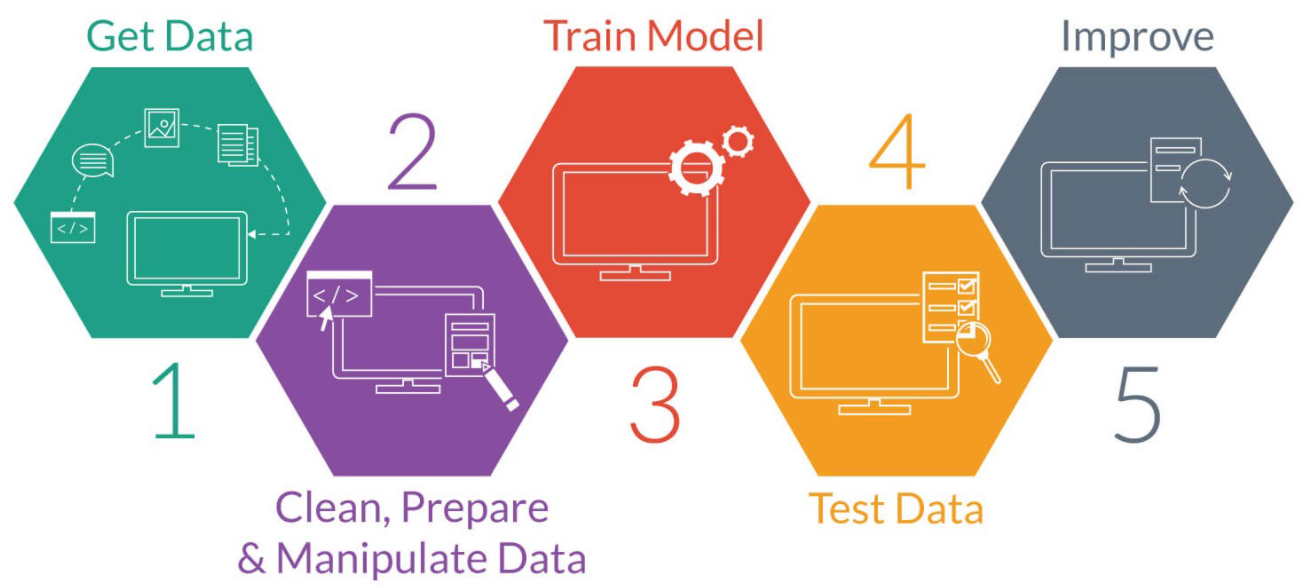

In [2]:
from IPython.display import Image
Image(filename='ML_Project_Steps.png') 

# Get Data (1) and Clean, Prepare & Manipulate Data (2)

### Lendo o conjunto de dados de treino

In [3]:
df_train = pd.read_csv('PM_train.txt', sep = " ", header = None)

### Tratando a Base de Dados (Valores nulos, Baixa variância, Colinearidade, Redução de Dimensionalidade)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [5]:
#Entender se a base possui valores nulos para excluí-los
df_train.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64

In [6]:
#Excluindo as duas últimas colunas, já que elas apresentam todos os valores nulos
df_train = df_train.iloc[:,:-2]

In [7]:
#Nomes propostos para as variáveis
columns_list = ["AssetID","Runtime","Setting1","Setting2","Setting3"]
for i in range(21):
    columns_list.append("Tag" + str(i+1))

#Alterando os nomes das colunas para os nomes propostos
df_train.columns = columns_list

In [8]:
#Número de Linhas e Colunas
print("Número de linhas: ", len(df_train),"\tNúmero de Colunas: ",len(df_train.columns))

Número de linhas:  20631 	Número de Colunas:  26


In [9]:
#Primeira análise descritiva - avaliar dispersão/variabilidade das features
df_train.describe()

,AssetID,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [10]:
#Excluir tags com baixa variância
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(df_train)
df_train = pd.DataFrame(selector.transform(df_train), columns = df_train.columns[selector.get_support(indices=False)])

In [11]:
#Número de Linhas e Colunas
print("Número de linhas: ", len(df_train),"\tNúmero de Colunas: ",len(df_train.columns))

Número de linhas:  20631 	Número de Colunas:  19


In [12]:
#Excluir Possíveis Colinearidades - Função para cálculo de VIF Scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

vif_scores(df_train)

,Independent Features,VIF Scores
0,AssetID,4.182802e+00
1,Runtime,7.431321e+00
2,Setting1,1.001735e+00
3,Setting2,1.001202e+00
4,Tag2,4.329551e+06
5,Tag3,1.533999e+05
6,Tag4,1.098546e+05
7,Tag6,2.437188e+08
8,Tag7,1.637732e+06
9,Tag8,3.269966e+09


###### Análise de Colinearidade
Após análise de VIF Score Global e Local (por cada asset), conclui-se que a avaliação não é válida para um processo como esse uma vez que processos industriais tendem a ser lineares/estáveis/constantes e controlados por parâmetros de processo. O estudo vai continuar sendo realizado com as 19 colunas (17 váriáveis,1 de identificação de Asset e outra de Tempo Parametrizado) até então.

In [13]:
tags_a_considerar = df_train.columns

### Análises Estatísticas e Visuais

In [14]:
#Distribuição dos valores de Runtime - onde cada unidade de Runtime consideramos um ciclo de RUL
df_train.groupby("AssetID").agg("max").Runtime.describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: Runtime, dtype: float64

In [15]:
#AssetID do pior e do melhor ciclo
worst_asset = df_train.groupby("AssetID").agg("max")[df_train.groupby("AssetID").agg("max").Runtime == df_train.groupby("AssetID").agg("max").Runtime.min()].index[0]
best_asset = df_train.groupby("AssetID").agg("max")[df_train.groupby("AssetID").agg("max").Runtime == df_train.groupby("AssetID").agg("max").Runtime.max()].index[0]
print("Worst: ",worst_asset)
print("Best: ", best_asset)

Worst:  39.0
Best:  69.0


Asset:  1.0


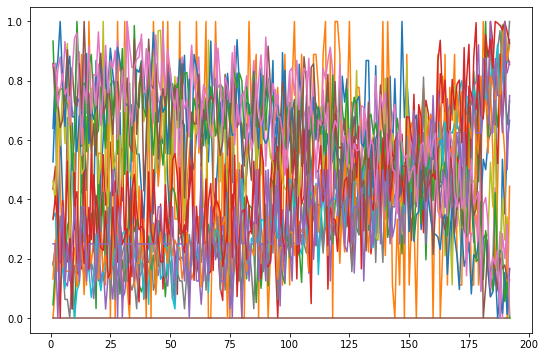

Asset:  2.0


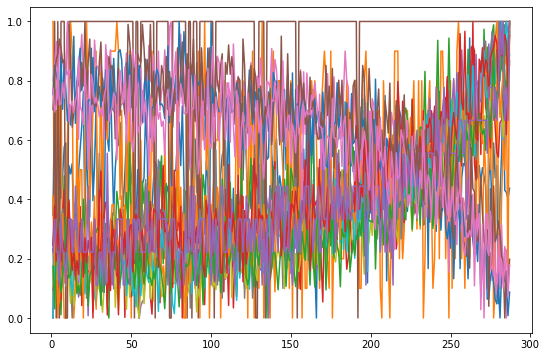

Asset:  3.0


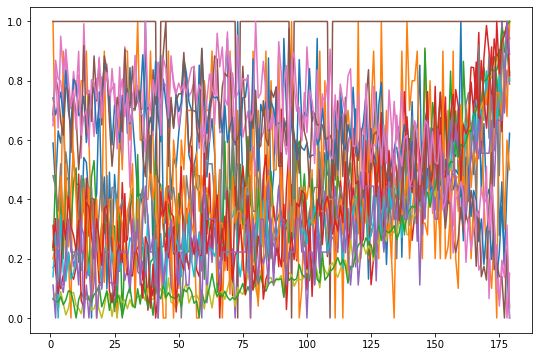

Asset:  4.0


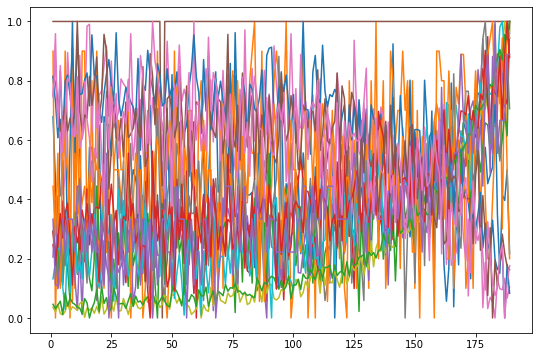

Asset:  5.0


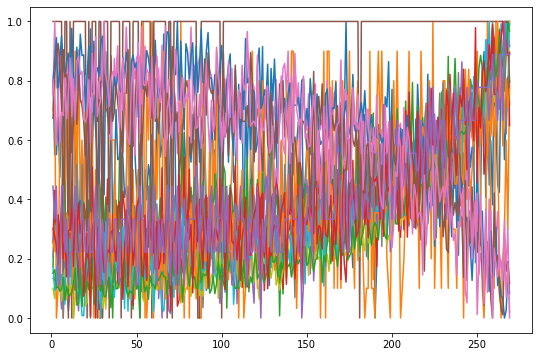

In [16]:
#Análise visual dos ciclos de cada asset
#Para facilitarmos o processo de visualização da variabilidade das features ao longo do tempo, vamos normalizar o dataset

from sklearn.preprocessing import MinMaxScaler

for asset in df_train.AssetID.unique():
    
    if asset >= 6:
        
        pass
    
    else:

        df_aux = df_train[df_train.AssetID == asset]
        runtime = df_aux.Runtime.values
        df_aux = df_aux.iloc[:,2:]

        scaler = MinMaxScaler()

        df_aux = pd.DataFrame(data = scaler.fit_transform(df_aux), columns = df_aux.columns)

        print("Asset: ", asset)

        plt.figure(figsize = (9,6))
        for feat in df_aux.columns:
            plt.plot(runtime, df_aux[feat].values)
        plt.show()

### Preparando o Conjunto de Dados para Manutenção Preditiva: Lag Features

In [17]:
#Incluir variável de falha - 0 ou 1 - para classificação
failure_list = []
for asset in df_train.AssetID.unique():
    
    df_aux = df_train[df_train.AssetID == asset]
       
    failure_list_aux = [0]*(len(df_aux)-1)
    failure_list_aux.append(1)
    
    for indicator in failure_list_aux:
        failure_list.append(indicator)
        
df_train["Failure"] = failure_list

In [18]:
#Calcular valores de "Lag Features" - considerar - 20 ciclos
ciclos = 20

dataframes_lag = []

#Nome das Colunas
colunas_media = [i + "_mean_20cyles" for i in df_train.iloc[:,2:-1].columns]
colunas_std = [i + "_std_20cyles" for i in df_train.iloc[:,2:-1].columns]

for asset in df_train.AssetID.unique():

    df_aux = df_train[df_train.AssetID == asset]
    
    runtime = df_aux.Runtime
    assetid = df_aux.AssetID
    failure = df_aux.Failure
    df_aux = df_aux.iloc[:,2:-1]
    
    media_aux = []
    std_aux = []
    
    for index in range(len(df_aux)):
        
        if index < 19:
            
            media_aux.append([0]*len(df_aux.columns))
            std_aux.append([0]*len(df_aux.columns))
        
        else:
            
            media_aux.append(list(df_aux.iloc[(index+1-ciclos):(index+1),:].mean().values))
            std_aux.append(list(df_aux.iloc[(index+1-ciclos):(index+1),:].std().values))
            
    df_aux_lag = pd.concat([assetid.reset_index().iloc[:,1:],runtime.reset_index().iloc[:,1:],
                            df_aux.reset_index().iloc[:,1:],
                            pd.DataFrame(data = media_aux,columns = colunas_media),
                            pd.DataFrame(data = std_aux,columns = colunas_std),
                            failure.reset_index().iloc[:,1:]],axis = 1)
    
    dataframes_lag.append(df_aux_lag)
    
df_train_lag = dataframes_lag[0].append(dataframes_lag[1:],ignore_index = True)

# Train Model (3) and Test Data (4)

### Separar o Conjunto de Dados em Treino e Teste

In [19]:
#Separa a base de dados até então em conjunto de treino e teste
#Como estamos falando de tempo de vida de diferentes assets, não vou utilizar o train_test_split, vou dividir por AssetID
#Ao separar a amostra em treino e teste, também vou excluir a tag de identificação e de passagem de tempo
x_train = df_train_lag[df_train_lag.AssetID < 97.0].iloc[:,2:-1]
y_train = df_train_lag[df_train_lag.AssetID < 97.0].iloc[:,-1]

x_test = df_train_lag[df_train_lag.AssetID >= 97.0].iloc[:,2:-1]
y_test = df_train_lag[df_train_lag.AssetID >= 97.0].iloc[:,-1]

### Importando Métricas de Avaliação

In [20]:
#Métricas de Avaliação
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Modelo: GradientBoostingClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state = 123)
GBC.fit(x_train,y_train)
y_predict = GBC.predict(x_test)

In [22]:
print("ROC AUC SCORE: ", round(roc_auc_score(y_test,y_predict),3))
print("GINI: ", round((2*roc_auc_score(y_test,y_predict)-1),3))
print("F1 SCORE: ",round(f1_score(y_test,y_predict),3))

ROC AUC SCORE:  0.499
GINI:  -0.001
F1 SCORE:  0.0


In [23]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)

True Negative:  738
False Positive:  1
False Negative:  4
True Positive:  0


### Modelo: RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 123)
RFC.fit(x_train,y_train)
y_predict = RFC.predict(x_test)

In [25]:
print("ROC AUC SCORE: ", round(roc_auc_score(y_test,y_predict),3))
print("GINI: ", round((2*roc_auc_score(y_test,y_predict)-1),3))
print("F1 SCORE: ",round(f1_score(y_test,y_predict),3))

ROC AUC SCORE:  0.5
GINI:  0.0
F1 SCORE:  0.0


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)

True Negative:  739
False Positive:  0
False Negative:  4
True Positive:  0


### Modelo: Regressão Logística 

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state = 123, max_iter = 1000)
LogReg.fit(x_train,y_train)
y_predict = LogReg.predict(x_test)

In [28]:
print("ROC AUC SCORE: ", round(roc_auc_score(y_test,y_predict),3))
print("GINI: ", round((2*roc_auc_score(y_test,y_predict)-1),3))
print("F1 SCORE: ",round(f1_score(y_test,y_predict),3))

ROC AUC SCORE:  0.625
GINI:  0.25
F1 SCORE:  0.4


In [29]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)

True Negative:  739
False Positive:  0
False Negative:  3
True Positive:  1


### Escolhendo o Modelo: Regressão Logística

Motivos: melhores métricas de classificação, principalmente e consideração do F1 Score, que é a métrica mais adequada para a classificação de conjunto de dados desbalanceados.

Vantagens da regressão logística: já tem uma função "nativa" de geração de vetor de probabilidades e possui também uma função "nativa" de importâncias das variáveis do modelo. Fácil compreensão do modelo uma vez que é uma extensão de um modelo linear.

Caso escolhessemos outro modelo de classificação acima, teríamos que utilizar técnicas complementares para a geração do vetor de probabilidades e de interpretação de modelo (como as bibliotecas Lime, Shap e Eli5).

### Vetor de Probabilidades e Avaliação das Respostas

In [30]:
#Gerando o vetor de probabilidades
y_predict_prob = LogReg.predict_proba(x_test)

AssetID:  97.0


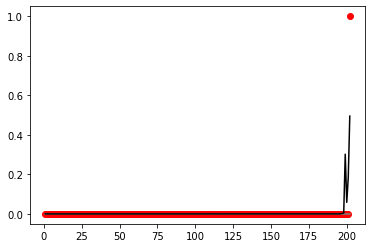

AssetID:  98.0


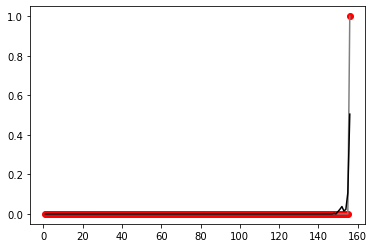

AssetID:  99.0


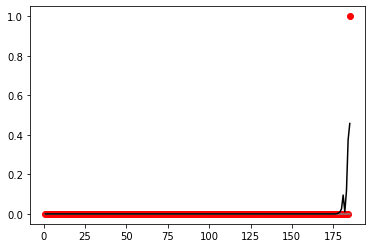

AssetID:  100.0


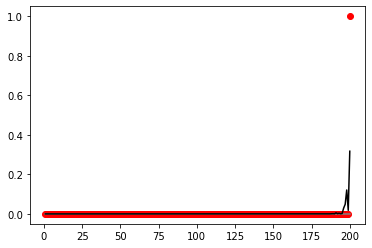

In [31]:
#Dataset para plotarmos as previsões binárias, as predições de probabilidade e o valor real para cada asset testado
df_test_plot = df_train_lag[df_train_lag.AssetID >= 97.0].iloc[:,:2]
df_test_plot["Fim de Ciclo Real"] = y_test
df_test_plot["Fim de Ciclo Pred"] = y_predict
df_test_plot["Fim de Ciclo Prob"] = y_predict_prob[:,1]

#Plotando os gráficos
for asset in df_test_plot.AssetID.unique():
    
    df_aux = df_test_plot[df_test_plot.AssetID == asset]
    
    print("AssetID: ", asset)
    
    plt.scatter(df_aux['Runtime'],df_aux['Fim de Ciclo Real'], color = "red")
    plt.plot(df_aux['Runtime'],df_aux['Fim de Ciclo Pred'], color = "gray")
    plt.plot(df_aux['Runtime'],df_aux['Fim de Ciclo Prob'], color = "black")
    plt.show()

### Vida Útil Remanescente 

In [32]:
#Entender a melhor porcentagem que diz quando um ativo possui apenas 20 ciclos para falhar
calculo_media = []

for asset in df_test_plot.AssetID.unique():
    
    calculo_media.append(df_test_plot[df_test_plot.AssetID == asset].iloc[-20:,:].iloc[0,:]["Fim de Ciclo Prob"])
    
probabilidade_media = np.mean(calculo_media)
    
print("\nMédia de Probabilidade que indica 20 ciclos até falha: ", probabilidade_media)


Média de Probabilidade que indica 20 ciclos até falha:  1.3263110413190252e-05


In [33]:
media = []

for asset in df_test_plot.AssetID.unique():
    
    df_aux = df_test_plot[(df_test_plot.AssetID == asset) & (df_test_plot["Fim de Ciclo Prob"] >= probabilidade_media)]
    media.append(len(df_aux))
    print("\nAsset: ", asset, "\tCiclos Anteriores à Falha: ", len(df_aux))


Asset:  97.0 	Ciclos Anteriores à Falha:  14

Asset:  98.0 	Ciclos Anteriores à Falha:  14

Asset:  99.0 	Ciclos Anteriores à Falha:  16

Asset:  100.0 	Ciclos Anteriores à Falha:  28


###### Identificação da RUL
O alerta para fim de vida útil pode ser obtido a partir do gatilho de probabilidade acima. Sendo assim, ao calcular as probabilidades no conjunto de dados de treino, podemos gerar um gatilho do tipo "RISCO DE FALHA EM ATÉ 20 CICLOS" e, com o número de ciclos passando com o tempo, podemos calcular o valor de ciclos que já se passaram.

### Avaliação das Features Principais

In [34]:
importances = pd.DataFrame(data = {"Atributo": x_train.columns, "Importances": LogReg.coef_[0]})

importances_modulo = []

for valor in importances.Importances:
    if valor > 0:
        importances_modulo.append(valor)
    else:
        importances_modulo.append(valor*(-1))
        
importances["Importances_mod"] = importances_modulo
importances = importances.sort_values(by = ["Importances_mod"], ascending = False).reset_index().iloc[:,1:]
importances.head(10)

,Atributo,Importances,Importances_mod
0,Tag12,-0.705900,0.705900
1,Tag17,0.658430,0.658430
2,Tag14_std_20cyles,0.596757,0.596757
3,Tag7,-0.561379,0.561379
4,Tag4_mean_20cyles,0.492479,0.492479
5,Tag4_std_20cyles,0.471854,0.471854
6,Tag3_mean_20cyles,0.374094,0.374094
7,Tag9_mean_20cyles,0.354860,0.354860
8,Tag7_mean_20cyles,-0.260666,0.260666
9,Tag14_mean_20cyles,-0.239657,0.239657


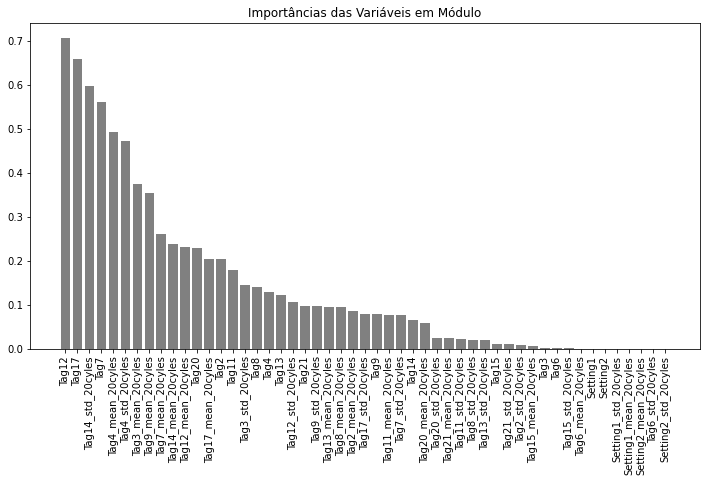

In [35]:
plt.figure(figsize=(12,6))
plt.bar(range(len(importances)),importances.Importances_mod, color = "gray")
plt.title("Importâncias das Variáveis em Módulo")
plt.xticks(range(len(importances)),importances.Atributo,rotation = "vertical")
plt.show()

###### Avaliação das Importâncias (Influências) das Features nas Falhas dos Ativos
Com o gráfico acima, podemos identificar as tags mais relevantes em ordem decrescente de importância. Podemos identificar, por exemplo, que as features de setting point (Setting1 e Setting2) não influenciam na predição e, para otimização do modelo em tempo de processamento, poderíamos eliminá-las. 

# Obter os Resultados da Amostra de Teste 

### Ler e Manipular os Dados de Teste 

In [36]:
#Lendo o conjunto de dados de teste
df_test = pd.read_csv('PM_test.txt', sep = " ", header = None)

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13096 non-null  int64  
 1   1       13096 non-null  int64  
 2   2       13096 non-null  float64
 3   3       13096 non-null  float64
 4   4       13096 non-null  float64
 5   5       13096 non-null  float64
 6   6       13096 non-null  float64
 7   7       13096 non-null  float64
 8   8       13096 non-null  float64
 9   9       13096 non-null  float64
 10  10      13096 non-null  float64
 11  11      13096 non-null  float64
 12  12      13096 non-null  float64
 13  13      13096 non-null  float64
 14  14      13096 non-null  float64
 15  15      13096 non-null  float64
 16  16      13096 non-null  float64
 17  17      13096 non-null  float64
 18  18      13096 non-null  float64
 19  19      13096 non-null  float64
 20  20      13096 non-null  float64
 21  21      13096 non-null  int64  
 22

In [38]:
#Entender se a base possui valores nulos para excluí-los
df_test.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    13096
27    13096
dtype: int64

In [39]:
#Como os dados de treino, excluir as duas últimas colunas de valores nulos
df_test = df_test.iloc[:,:-2]

#nomear as tags pois já sabemos seus nomes
df_test.columns = columns_list

#Como na base de treino já identificamos quais tags deveriam ser eliminadas por baixa variância, vamos eliminar aqui
df_test = df_test[tags_a_considerar]

In [40]:
#criar os lag features
#Calcular valores de "Lag Features" - considerar - 20 ciclos
ciclos = 20

dataframes_lag = []

#Nome das Colunas
colunas_media = [i + "_mean_20cyles" for i in df_test.iloc[:,2:].columns]
colunas_std = [i + "_std_20cyles" for i in df_test.iloc[:,2:].columns]

for asset in df_test.AssetID.unique():

    df_aux = df_test[df_test.AssetID == asset]
    
    runtime = df_aux.Runtime
    assetid = df_aux.AssetID
    df_aux = df_aux.iloc[:,2:]
    
    media_aux = []
    std_aux = []
    
    for index in range(len(df_aux)):
        
        if index < 19:
            
            media_aux.append([0]*len(df_aux.columns))
            std_aux.append([0]*len(df_aux.columns))
        
        else:
            
            media_aux.append(list(df_aux.iloc[(index+1-ciclos):(index+1),:].mean().values))
            std_aux.append(list(df_aux.iloc[(index+1-ciclos):(index+1),:].std().values))
            
    df_aux_lag = pd.concat([assetid.reset_index().iloc[:,1:],runtime.reset_index().iloc[:,1:],
                            df_aux.reset_index().iloc[:,1:],
                            pd.DataFrame(data = media_aux,columns = colunas_media),
                            pd.DataFrame(data = std_aux,columns = colunas_std)],axis = 1)
    
    dataframes_lag.append(df_aux_lag)
    
df_test_lag = dataframes_lag[0].append(dataframes_lag[1:],ignore_index = True)

### Predição

In [41]:
#Excluir a coluna de AssetID
test_data = df_test_lag.iloc[:,2:]

In [42]:
#Prever conforme o modelo anteriormente criado
y_pred = LogReg.predict(test_data)
y_pred_prob = LogReg.predict_proba(test_data)

In [43]:
#DataFrame com as probabilidades
assetid = list(df_test_lag.AssetID.values)
df_prob = pd.DataFrame(data = {"AssetID": assetid, "Probabilidade": y_pred_prob[:,1]})

In [44]:
#Categorizando o risco de falha
assetid = df_prob.AssetID.unique()

resposta_bin = []
ciclos_restantes = []

for asset in assetid:
    
    df_prob_aux = df_prob[df_prob.AssetID == asset]
    
    df_prob_aux = df_prob_aux[df_prob_aux.Probabilidade >= probabilidade_media]
    
    if len(df_prob_aux) == 0:
        
        resposta_bin.append("Não")
        ciclos_restantes.append(np.nan)
        
    else:
        
        resposta_bin.append("Sim")
        ciclos_restantes.append(20-len(df_prob_aux))

In [45]:
#dataframe final
df_final = pd.DataFrame(data = {"AssetID": assetid, 
                                "Risco de Falhar em até 20 ciclos?": resposta_bin,
                                "Ciclos Restantes ": ciclos_restantes})

df_final.to_excel("Dados de Teste.xlsx")

# Improve (5) 

###### Como Melhorar o Modelo
- Melhorar os intervalos das "lag features" e os valores e/ou estatísticas descritivas que utilizamos como lag features
- Buscar mais modelos de classificação para a categorização de falha ou não, mais modelos de regressão para o cálculo da vida útil remanescente no ativo (RUL) e utilizar mais de um modelo para cada finalidade 
- Buscar otimizar os hiperparâmetros dos modelos 
- Utilizar modelos de redes neurais (Redes Neurais Recorrentes (RNNs), LSTM)
- Se os passos acima ainda não forem suficientes, aumentar a amostra de treinamento (100 assets ainda é um valor relativamente baixo)

###### Próximos Passos em Nossa Missão de Atuar Preditivamente em Manutenção
- Buscar criar cartas de controle e identificação de anomalias para as variáveis mais críticas e controlá-las em tempo real
- Após obter o modelo ideal, automatizar as etapas de extração de dados (bancos de dados com os valores dos sensores e tags), tratamento de dados e de predição em funções ou então em uma Pipeline
- Automatizar o modelo para prever constantemente o status do ativo com o auxílio de programação em nuvem, máquina virtual ou até mesmo alguma máquina física dedicada para a função, a qual permanecerá ligada se necessário (utilizando arquivos .bat e o Agendador de Tarefas de uma máquina Windows)